# Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
# null value analysis
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

# Data Cleaning

In [ ]:
#print(df['Region'].value_counts())
df[' Frequency'].value_counts()  # str.strip() to be made for all words including col names

 M    267
Name:  Frequency, dtype: int64

In [ ]:
# stripping all words
df = df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['Frequency'].value_counts()

M    267
Name: Frequency, dtype: int64

In [ ]:
# all entries of Frequency is 'Monthly' --> No impact --> delete
del df['Frequency']
df.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
# # label-encoding for Area
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Area_encoded'] = label_encoder.fit_transform(df['Area'])
# df['Area_encoded'].value_counts()

In [ ]:
# Duplicate entries check
df.duplicated().any()

False

In [ ]:
# datetime splitting -- keeping date in one variable won't give good insights
import datetime as dt
import calendar
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
#df['Year'] =  df['Date'].dt.year --> All are from 2020 -- No impact
df.head(5)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74,May


# Analysis

## Estimated Unemployment and Labor Participation Rate

In [ ]:
data = df.groupby('Month')[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)', 'Estimated Employed']].mean()
data = pd.DataFrame(data).reset_index()
data

,Month,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Estimated Employed
0,Apr,22.236154,35.297308,1.057020e+07
1,Aug,10.313333,42.390741,1.442904e+07
2,Feb,9.266154,44.180769,1.548827e+07
3,Jan,9.196538,44.626538,1.563720e+07
4,Jul,9.834444,42.274815,1.441802e+07
5,Jun,10.911111,41.203333,1.385739e+07
6,Mar,10.782593,43.746667,1.453866e+07
7,May,23.244444,39.647778,1.150739e+07
8,Oct,8.026296,41.438519,1.457998e+07
9,Sep,8.705926,41.974444,1.458784e+07


<Figure size 1200x600 with 0 Axes>

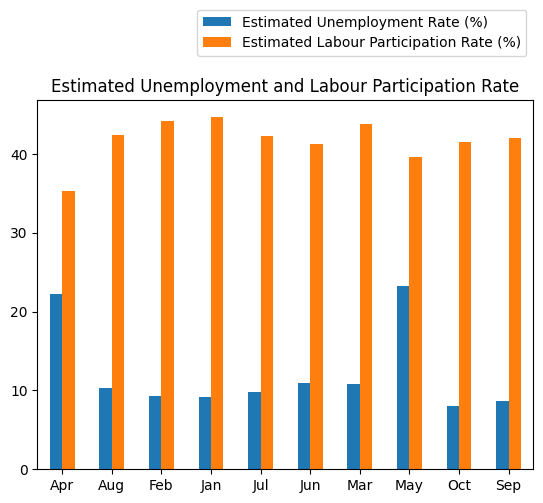

In [ ]:
month = list(data['Month'])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data1 = data[['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']]
ax = data1.plot(kind='bar')
ax.legend(loc='lower right', bbox_to_anchor=(1, 1.1))
plt.xticks(range(len(month)),list(month), rotation=0)
plt.title('Estimated Unemployment and Labour Participation Rate',loc='center')
plt.show()

## Estimated Employed

In [ ]:
# Estimated Employed
import plotly.express as px

data2 = data[['Estimated Employed', 'Month']]
fig = px.bar(data2,x='Month',y='Estimated Employed',color='Month',
            category_orders ={'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},
            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

## Statewise Analysis

In [ ]:
data_state = df.groupby('Region')[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)', 'Estimated Employed']].mean()
data_state = pd.DataFrame(data_state).reset_index()
data_state

,Region,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Estimated Employed
0,Andhra Pradesh,8.664000,38.962000,1.542548e+07
1,Assam,4.856000,43.498000,1.081028e+07
2,Bihar,19.471000,37.173000,2.360683e+07
3,Chhattisgarh,7.819000,41.161000,8.421349e+06
4,Delhi,18.414000,35.857000,4.632822e+06
5,Goa,12.167000,39.242000,4.423748e+05
6,Gujarat,6.376000,45.490000,2.273075e+07
7,Haryana,27.477000,42.100000,6.844059e+06
8,Himachal Pradesh,16.065000,40.252000,2.033885e+06
9,Jammu & Kashmir,16.477778,37.894444,3.310032e+06


In [ ]:
import plotly.express as px
fig = px.bar(data_state, x='Region', y='Estimated Unemployment Rate (%)', color='Region')

# y-axis to ensure visibility
fig.update_layout(title={'text':"<b>State Wise Average Unemployment Rate </b>", 'x':0.5},xaxis={'categoryorder': 'total descending'},
                  yaxis=dict(range=[0, data_state['Estimated Unemployment Rate (%)'].max() + 5]))

fig.show()


Average Unemployment Rate Analysis: <br>




*   Haryana has the largest unemployement rate <br>
*   Meghalaya has the lowest unemployment rate <br>



In [ ]:
# scatter geographically
px.scatter_geo(df, 'longitude', 'latitude', scope='asia', color='Region',size='Estimated Unemployment Rate (%)',animation_frame='Month')

# Region-wise Analysis

In [ ]:
regions = sorted(list(df["Region.1"].unique()))
regions

['East', 'North', 'Northeast', 'South', 'West']

In [ ]:
region_df = df.groupby("Region.1")[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
region_df

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Region.1,,,
East,13.916000,1.960237e+07,40.108750
North,15.889620,1.307249e+07,38.702658
Northeast,10.950263,3.617106e+06,52.055263
South,10.454667,1.404059e+07,40.436167
West,8.239000,1.862351e+07,41.257000


<Figure size 1200x600 with 0 Axes>

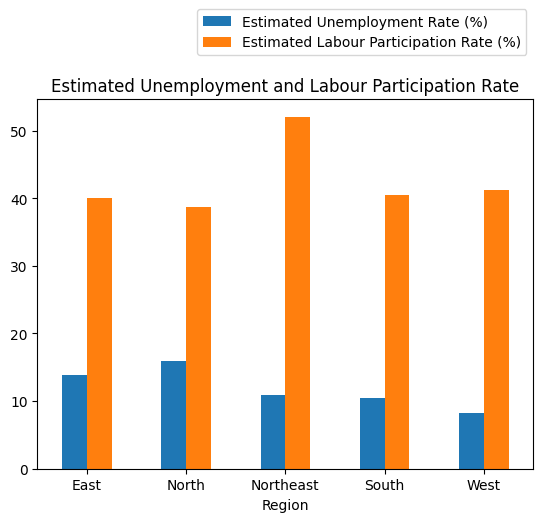

In [ ]:
# region wise unemployment and labor participation comparison
plt.figure(figsize=(12, 6))
reg = region_df[['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']]
ax = reg.plot(kind='bar')
ax.legend(loc='lower right', bbox_to_anchor=(1, 1.1))
plt.xticks(range(len(regions)),regions, rotation=0)
plt.xlabel("Region")
plt.title('Estimated Unemployment and Labour Participation Rate',loc='center')
plt.show()

<Axes: xlabel='Region.1'>

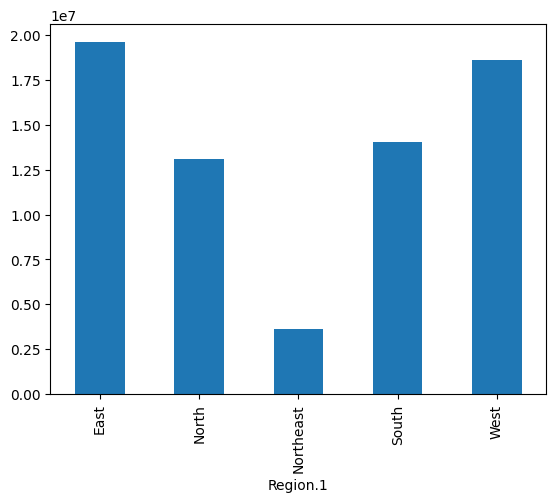

In [ ]:
# Estimated Employed regionwise
est_empl = region_df['Estimated Employed']
est_empl.plot(kind='bar')

In [ ]:
unemployed = df.groupby(['Region.1', 'Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()
unemployed

,Region.1,Region,Estimated Unemployment Rate (%)
0,East,Bihar,19.471000
1,East,Jharkhand,19.539000
2,East,Odisha,6.462000
3,East,West Bengal,10.192000
4,North,Delhi,18.414000
5,North,Haryana,27.477000
6,North,Himachal Pradesh,16.065000
7,North,Jammu & Kashmir,16.477778
8,North,Punjab,11.981000
9,North,Rajasthan,15.868000


In [ ]:
# unemployment in pie chart model
px.sunburst(unemployed, path=(['Region.1', 'Region']), values='Estimated Unemployment Rate (%)')

## Most affected in Lockdown

In [ ]:
# categorize by date -- approx 1st April was start of lockdown
months = list(df['Month'].unique())
months

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [ ]:
from sklearn import preprocessing
df_temp = df

df_temp = df.copy()
label_encoder = preprocessing.LabelEncoder()
df_temp['Month'] = label_encoder.fit_transform(df_temp['Month'])
print(df_temp['Month'])
print(df['Month'])

0      3
1      2
2      6
3      0
4      7
      ..
262    5
263    4
264    1
265    9
266    8
Name: Month, Length: 267, dtype: int64
0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
262    Jun
263    Jul
264    Aug
265    Sep
266    Oct
Name: Month, Length: 267, dtype: object
